## CLUSTERING - Unsupervised Learning

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("cars.xls")

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#başarı oranımızı silhouette_score ile ölçeriz
#silhouette : benzerlik score, gölge gibi düşünün,
#ne kadar çok parçaya bölersek benzerliği düşer ama

In [5]:
x=df[["Price","Mileage",'Cylinder']]
#sadece 3 özelliğinin aldık

In [6]:
x.head() 

,Price,Mileage,Cylinder
0,17314.103129,8221,6
1,17542.036083,9135,6
2,16218.847862,13196,6
3,16336.913140,16342,6
4,16339.170324,19832,6


In [7]:
model=KMeans(n_clusters=4)   #4 gruba ayırıyoruz

In [8]:
model=model.fit(x)   #hani verinin kime ne kadar benzediğiini öğrettik 

In [9]:
pred=model.predict(x)

In [10]:
pred   #arabaları benzerliklerine göre 0-1-2-3 diye numaralandırdı

array([2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 3, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 0, 3, 0,
       0, 3, 0, 0, 2, 2, 2, 2, 3, 3, 3, 3, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3,
       1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,

In [11]:
x['cluster']=pred #bu sütunu oluşturdum

In [12]:
x.head()

,Price,Mileage,Cylinder,cluster
0,17314.103129,8221,6,2
1,17542.036083,9135,6,2
2,16218.847862,13196,6,2
3,16336.913140,16342,6,2
4,16339.170324,19832,6,0


In [13]:
silhouette_score(x,pred)
#4 grubu benzerliklerine göre ayırdı
#her grubun kednine ait merkezi var ve ona göre karı var
#nerede durman gerektiğini söylüyor
#centroit diyoruz bu duruma

0.41328610364684915

### Elbow Method-Dirsek Mehodu

##### Dirsek nerede kırılmaya başlarsa o kadar gruba ayırmamız gerekiyor. Normalde 4 gruba ayırmıştık. acaba doğru mu ayırdık

In [14]:
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        model=model.fit(x)
        pred=model.predict(x)
        score=silhouette_score(x,pred)
        print ("Number of cluster{}, silhoette{}".format(no_of_cluster,score))

In [15]:
clust=x.assign(Cluster=model.labels_)
model.cluster_centers_.astype('int')  #cluster_centers:4 grubun merkez noktalarını semturumlarını gösteriyor.
model.labels_
 
#kendimize rastgele merkezler seçiyoruz bunada CENTROIDS deriz

array([2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 3, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 0, 3, 0,
       0, 3, 0, 0, 2, 2, 2, 2, 3, 3, 3, 3, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3,
       1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


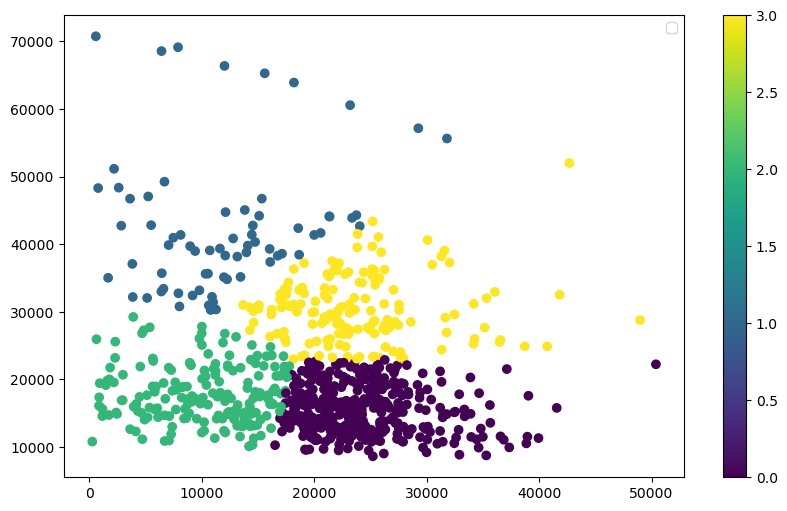

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(x.Mileage,x.Price,c=pred)
plt.legend()
plt.colorbar() 
plt.show()

In [17]:
# Predicticting the silhouette score for each clusters 
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust (clusters): 
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters = no_of_cluster)
        model=model.fit(x)
        pred=model.fit_predict(x)
        sum_of_squared_distances.append(model.inertia_)
        score = silhouette_score(x,pred)
        print("Number of cluster {},silhouette{}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(10)


Number of cluster 2,silhouette0.4511454177292382
Number of cluster 3,silhouette0.41321086771955506
Number of cluster 4,silhouette0.41328610364684915
Number of cluster 5,silhouette0.3550133345793275
Number of cluster 6,silhouette0.3608169282581948
Number of cluster 7,silhouette0.3568891518206085
Number of cluster 8,silhouette0.34003469991697244
Number of cluster 9,silhouette0.3485873392996964
Number of cluster 10,silhouette0.3591347616642612


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


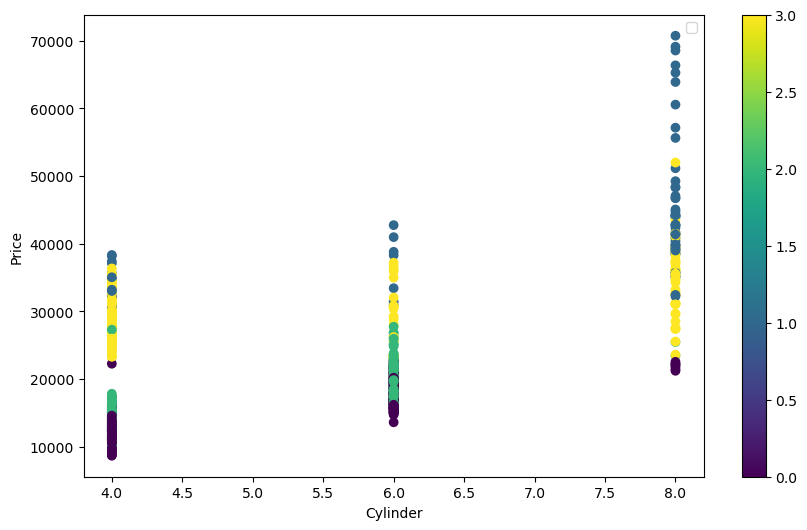

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(x.Cylinder,x.Price,c=pred)
plt.xlabel('Cylinder')
plt.ylabel('Price')
plt.legend()
plt.colorbar()
plt.show()

#4-6-8 cylinder'li araç varmış, 8 e doğru price artıyormuş

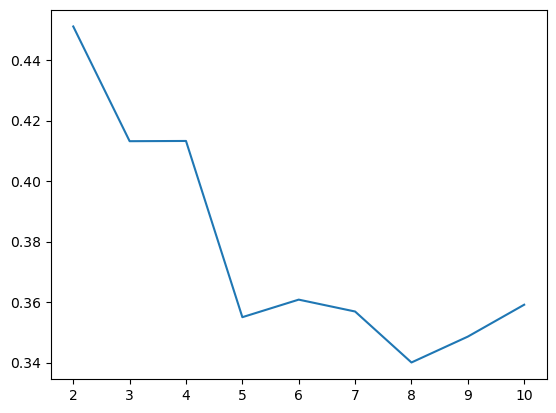

In [20]:
plt.plot(allclusters,allscore)

<function matplotlib.pyplot.show(close=None, block=None)>

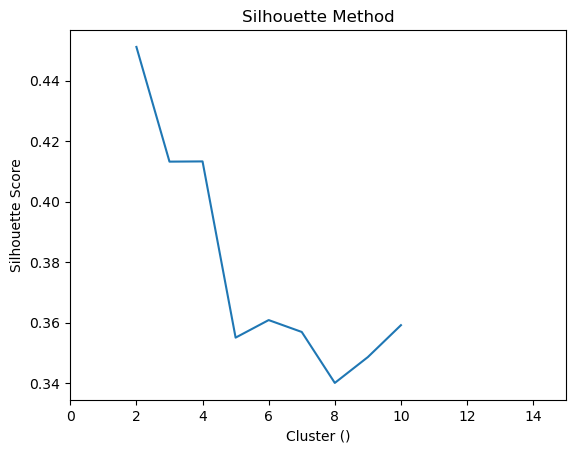

In [21]:
#plotting the silhouette method
plt.plot(allclusters,allscore)
plt.xlabel("Cluster ()")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method")
plt.xlim(0,15)
plt.show

In [22]:
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust (clusters): 
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters = no_of_cluster)
        model=model.fit(x)
        pred=model.fit_predict(x)
        sum_of_squared_distances.append(model.inertia_)
        score = silhouette_score(x,pred)
        print("Number of cluster {},silhouette{}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(9)
#clust-9 yazdım ve 9 cluster çağırmış oldum
#silhouette score düşüşe geçtiği anda orada bırakıyoruz
# o zaman bizim gruplama numaramız 4 olacak

Number of cluster 2,silhouette0.45170118960594147
Number of cluster 3,silhouette0.41321086771955506
Number of cluster 4,silhouette0.41371636340320656
Number of cluster 5,silhouette0.3552591928677026
Number of cluster 6,silhouette0.34791871150313647
Number of cluster 7,silhouette0.3590462162090309
Number of cluster 8,silhouette0.36108433287051794
Number of cluster 9,silhouette0.34811069656821764


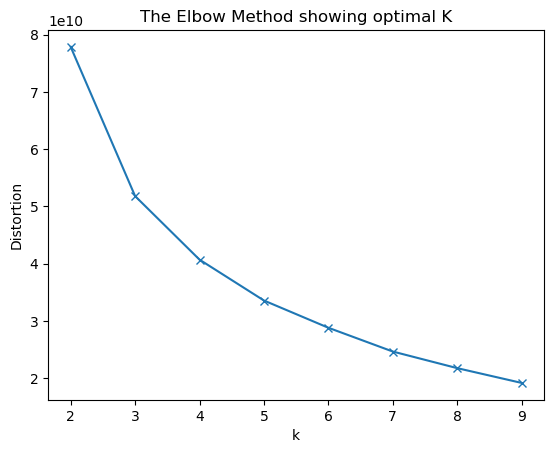

In [23]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimal K')
plt.show()
#4 te kırılma olmuş, kırılma noktası, elbow metodu nerede kırılma varsa cluster yapıyoruz?


In [24]:
with pd.ExcelWriter("arabadeneme.xlsx") as writer:
    df.to_excel(writer, sheet_name="Sheet1")  
    df.to_excel(writer, sheet_name="Sheet2")
#DATALARI EXCEL DOSYASI OLARAK PAYLAŞMAK İÇİN EN SON KULLANILAN